In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
budget_df = pd.read_csv('Phase 1 Project Data/tn.movie_budgets.csv')

In [131]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   profit             5782 non-null   int64         
 7   release_month      5782 non-null   int64         
 8   foreign_gross      5782 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 406.7+ KB


In [132]:
budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,release_month,foreign_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07,7.050675,4.961413e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08,3.480147,1.131192e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08,1.000000,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06,4.000000,0.000000e+00
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06,7.000000,5.701766e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07,10.000000,4.682110e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,12.000000,2.015838e+09


TN seems to be a better dataset compared to BOM since it has more data and has a budget column which will allow you to calculate profit. Also there are no missing values 

In [82]:
#Convert columns 3-5 into integers.

budget_df['production_budget'] = budget_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

In [141]:
#Create profit column. Split out month from the release date to be used in visualization. 

budget_df['profit'] = budget_df['worldwide_gross'] - budget_df['production_budget']
budget_df['foreign_gross'] = budget_df['worldwide_gross'] - budget_df['domestic_gross']
budget_df['ROI'] = (budget_df['profit'] / budget_df['production_budget']) * 100
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
budget_df['release_month'] = budget_df['release_date'].dt.month.astype(int)
budget_df['release_year'] = budget_df['release_date'].dt.year.astype(int)

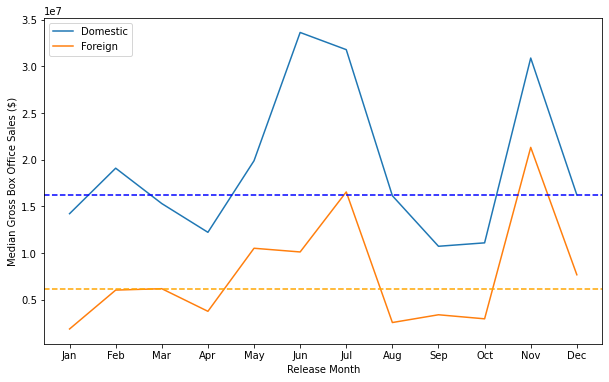

In [142]:
#Create groupedby month subset and create visualization for monthly worldwide sales 

month_grouped_df = budget_df.groupby('release_month', axis = 0).median().sort_values('release_month', ascending = True)
domestic_median = month_grouped_df['domestic_gross'].median()
foreign_median = month_grouped_df['foreign_gross'].median()

plt.figure(figsize=(10,6))
sns.lineplot(x = month_grouped_df.index, y = 'domestic_gross', data = month_grouped_df, label = 'Domestic')
sns.lineplot(x = month_grouped_df.index, y = 'foreign_gross', data = month_grouped_df, label = 'Foreign')
plt.axhline(foreign_median, color = 'orange', linestyle = 'dashed')
plt.axhline(domestic_median, color = 'b', linestyle = 'dashed')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Release Month')
plt.ylabel('Median Gross Box Office Sales ($)')
plt.legend(loc = 'upper left');

In [143]:
#Calculate averge performance over the median for peak months

peak_domestic_performance_over_median = ((month_grouped_df['domestic_gross'].loc[[6,7,11]].mean() - domestic_median)/ domestic_median) * 100
peak_domestic_performance_over_median

peak_foreign_performance_over_median = ((month_grouped_df['foreign_gross'].loc[[6,7,11]].mean() - foreign_median)/ foreign_median) * 100
peak_foreign_performance_over_median

162.12599438606023

June, July and November are the peak times for releasing a new movie into theaters. Gross domestic sales during these peak months are on average 98% better than the annual median. The same trend holds true for the foreign market with gross sales up 162% over the annual median during peak months. Based on this trend, my recommendation would be for Microsoft to target early summer and November as release dates for their upcoming films. 

In [145]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   profit             5782 non-null   int64         
 7   release_month      5782 non-null   int64         
 8   foreign_gross      5782 non-null   int64         
 9   release_year       5782 non-null   int64         
 10  ROI                5782 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 497.0+ KB


In [146]:
budget_df.to_csv('budget_df.csv')